In [19]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

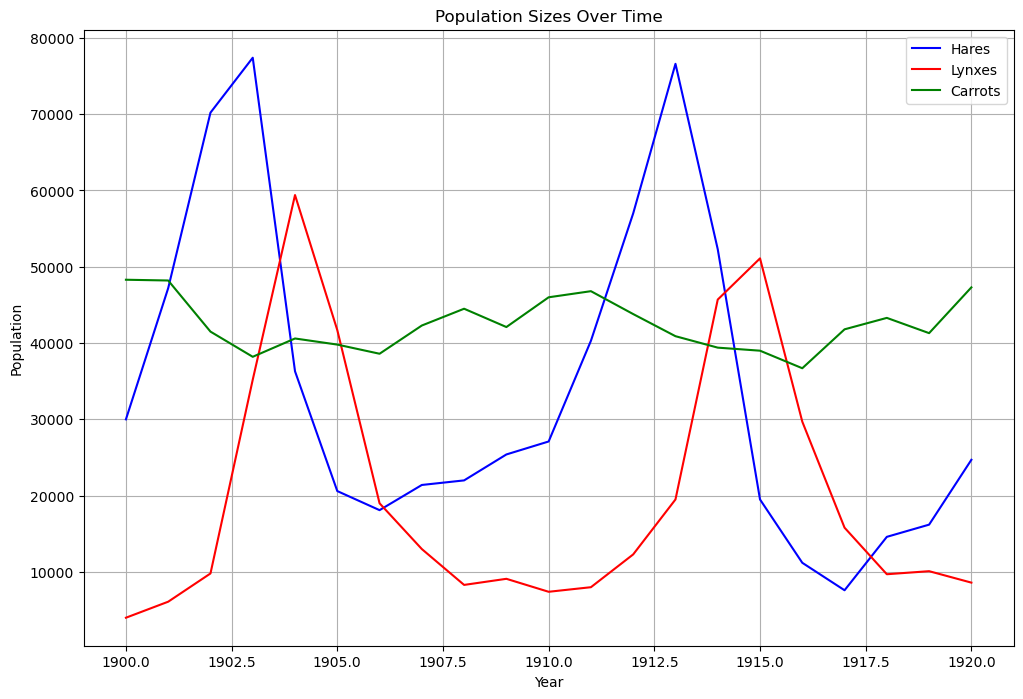

In [64]:
plt.figure(figsize=(12, 8))

plt.plot(years, hares, 'b-', label='Hares')
plt.plot(years, lynxes, 'r-', label='Lynxes')
plt.plot(years, carrots, 'g-', label='Carrots')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Sizes Over Time')
plt.legend()
plt.grid(True)

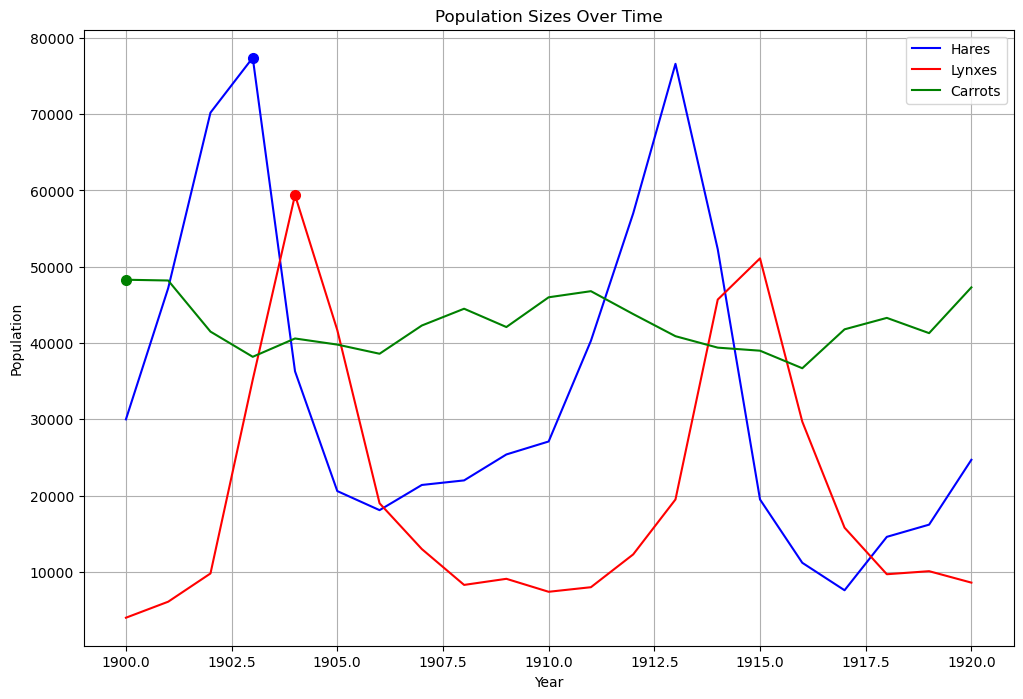

In [66]:
plt.figure(figsize=(12, 8))

plt.plot(years, hares, 'b-', label='Hares')
plt.plot(years, lynxes, 'r-', label='Lynxes')
plt.plot(years, carrots, 'g-', label='Carrots')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Sizes Over Time')
plt.legend()
plt.grid(True)

max_hare_year = years[np.argmax(hares)]
max_lynx_year = years[np.argmax(lynxes)]
max_carrot_year = years[np.argmax(carrots)]

plt.plot(max_hare_year, np.max(hares), 'bo', markersize=7)
plt.plot(max_lynx_year, np.max(lynxes), 'ro', markersize=7)
plt.plot(max_carrot_year, np.max(carrots), 'go', markersize=7)

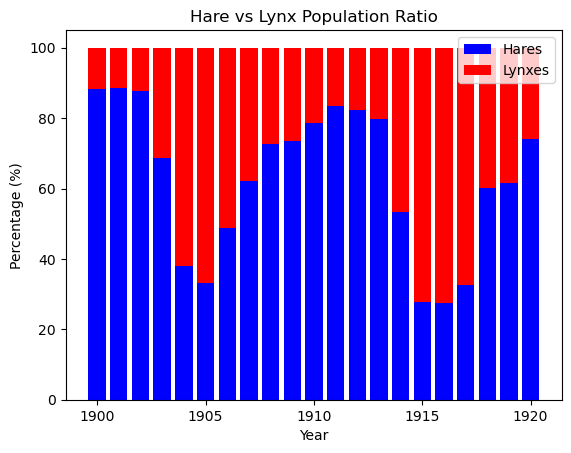

In [63]:
total = hares + lynxes
hare_ratio = (hares / total) * 100
lynx_ratio = (lynxes / total) * 100

plt.bar(years, hare_ratio, label='Hares', color='blue')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label='Lynxes', color='red')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Hare vs Lynx Population Ratio')
plt.legend()

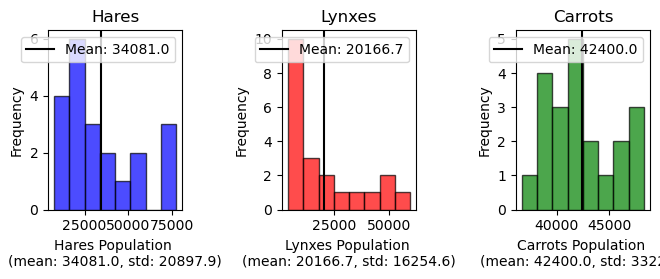

In [69]:
means = [np.mean(hares), np.mean(lynxes), np.mean(carrots)]
stds = [np.std(hares), np.std(lynxes), np.std(carrots)]

species_names = ['Hares', 'Lynxes', 'Carrots']
colors = ['blue', 'red', 'green']
populations = [hares, lynxes, carrots]

for i, (pop, name, color) in enumerate(zip(populations, species_names, colors)):
    plt.subplot(2, 3, 1+i) 
    plt.hist(pop, bins=8, alpha=0.7, color=color, edgecolor='black')
    plt.axvline(means[i], color='black', linewidth=1.5, 
                label=f'Mean: {means[i]:.1f}')
    plt.xlabel(f'{name} Population \n(mean: {means[i]:.1f}, std: {stds[i]:.1f})')
    plt.ylabel('Frequency')
    plt.title(f'{name}')
    plt.legend()

plt.tight_layout(pad=0, w_pad=3.0, h_pad=3.0)
plt.show()

Largest species each year: ['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


Text(0.5, 1.0, 'Years with Largest Population')

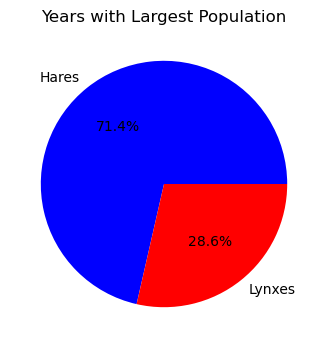

In [62]:
largest_species = ['H' if hares[i] > lynxes[i] else 'L' for i in range(len(hares))]
print("Largest species each year:", largest_species)

plt.figure(figsize=(12, 4))

h_count = largest_species.count('H')
l_count = largest_species.count('L')
plt.pie([h_count, l_count], labels=['Hares', 'Lynxes'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Years with Largest Population')

Correlation between hares and lynxes: 0.072


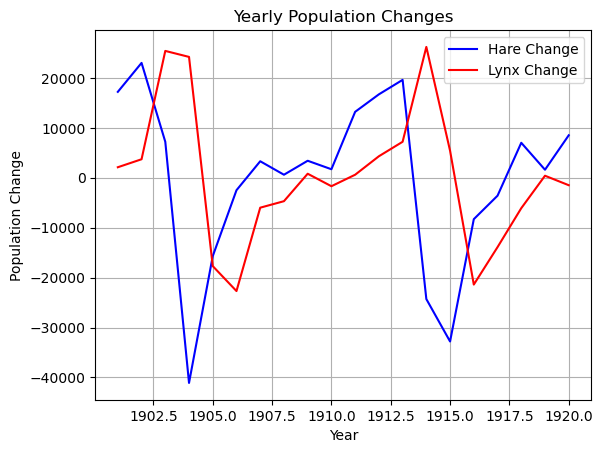

In [61]:
hare_changes = np.diff(hares)
lynx_changes = np.diff(lynxes)

plt.plot(years[1:], hare_changes, 'b-', label='Hare Change')
plt.plot(years[1:], lynx_changes, 'r-', label='Lynx Change')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Yearly Population Changes')
plt.legend()
plt.grid(True)

correlation = np.corrcoef(hares, lynxes)[0, 1]
print(f"Correlation between hares and lynxes: {correlation:.3f}")

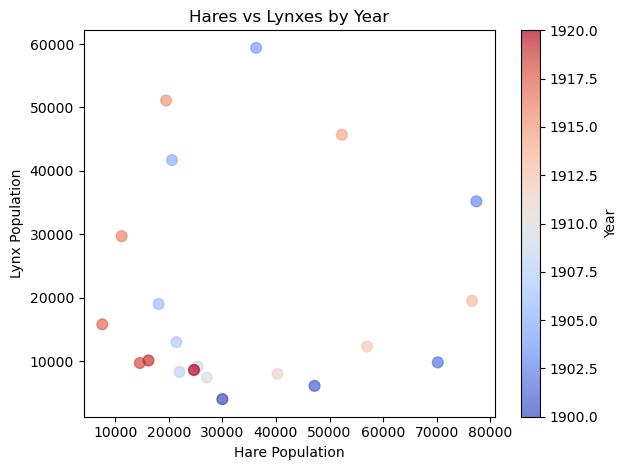

In [72]:
plt.scatter(hares, lynxes, c=years, cmap='coolwarm', s=60, alpha=0.7)
plt.colorbar(label='Year')
plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Hares vs Lynxes by Year')

plt.tight_layout()
plt.show()

In [73]:
X = years[:-1].reshape(-1, 1)
y = hares[:-1]                

X_with_intercept = np.column_stack([np.ones(len(X)), X])

# Solve normal equation: (X^T X)^-1 X^T y
coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

predicted_hare_1920 = coefficients[0] + coefficients[1] * 1920
true_hare_1920 = hares[-1]

error_ratio = abs(predicted_hare_1920 - true_hare_1920) / true_hare_1920

print(f"\nHare population estimation for 1920:")
print(f"Predicted: {predicted_hare_1920:.1f}")
print(f"Actual: {true_hare_1920:.1f}")
print(f"Error ratio: {error_ratio:.3f}")


Hare population estimation for 1920:
Predicted: 19775.8
Actual: 24700.0
Error ratio: 0.199


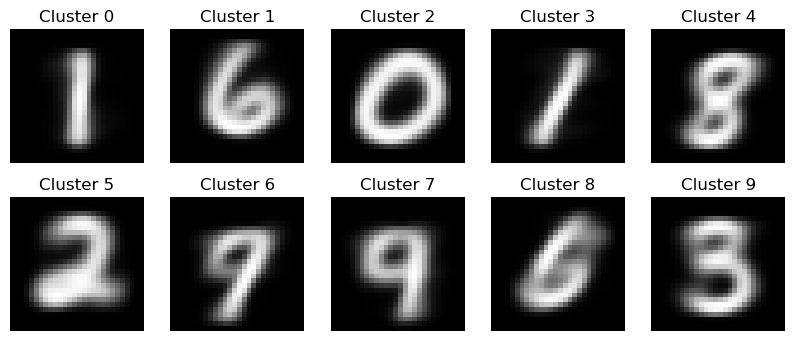

178432235366.3729


In [74]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

def initialize_random_centroids(K, X):
    m, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        centroids[i] =  X[np.random.choice(range(m))] 
    return centroids


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))


def closest_centroid(x, centroids, K):
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) 


def create_clusters(centroids, K, X):

    m, _ = np.shape(X)
    distances = cdist(X, centroids)
    cluster_idx = np.argmin(distances, axis=1)
    return cluster_idx

def compute_means(cluster_idx, K, X):
    _, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):

        points = X[cluster_idx == i]
        centroids[i] = np.mean(points, axis=0) 
    return centroids

def compute_sse(cluster_idx, centroids, X):
    sse = 0.0
    for i in range(len(centroids)):
        points = X[cluster_idx == i]
        if len(points) > 0:
            sse += np.sum(np.linalg.norm(points - centroids[i], axis=1) ** 2)
    return sse
    
def run_Kmeans(K, X, max_iter, threshold):
    centroids = initialize_random_centroids(K, X)
    prev_sse = -1.0;
    
    for _ in range(max_iter):
        clusters = create_clusters(centroids, K, X)
        previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
        centroids = compute_means(clusters, K, X)

        diff = previous_centroids - centroids
        if not diff.any():
            return centroids,  current_sse
            
        current_sse = compute_sse(clusters, centroids, X)
        if prev_sse != -1.0:
            if abs(prev_sse - current_sse) < threshold:
                break

        prev_sse = current_sse
    return centroids, current_sse

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
centroids, sse = run_Kmeans(10, X, 1000, 1e-4)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i].reshape(28,28), cmap='Grays_r')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()

print(sse)